# Model of work distribution in a flat organization

* no managers; only workers
* no support staff; all infrastructure for communication and tasks works without failure
* no dark patterns

TODO:
* use realistic distributions (e.g., power law) instead of uniform
* instead of searching randomly, search second-order contacts

In [1]:
import random
import numpy
print("numpy", numpy.__version__)
import pandas
print("pandas", pandas.__version__)
import seaborn
print("seaborn", seaborn.__version__)
import matplotlib
print("matplotlib", matplotlib.__version__)
from matplotlib import pyplot as plt
import sys
print(sys.version_info)

numpy 1.23.5
pandas 1.5.2
seaborn 0.12.2
matplotlib 3.6.2
sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)


In [2]:
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

In [3]:
import lib_simulation

### global variables for simulation

#### user-defined

In [4]:
import configuration_simCount1_skills2_levels2_duration1_people8_social0_ticks100 as config

#import configuration_simCount1_skills2_levels2_duration1_people8_social2_ticks100 as config

### input validation

In [5]:
if len(config.skill_set_for_people)<1:
    raise Exception("invalid value")
if len(config.skill_set_for_tasks)<1:
    raise Exception("invalid value")
    
if config.max_skill_level_per_person<1:
    raise Exception("invalid value")
if config.max_skill_level_per_task<1:
    raise Exception("invalid value")
if config.max_task_duration_in_ticks<1:
    raise Exception("invalid value")
    
if config.min_number_of_people<1:
    raise Exception("invalid value")
if config.max_number_of_people<1:
    raise Exception("invalid value")
if ((config.min_number_of_people) > (config.max_number_of_people)):
    print(config.min_number_of_people)
    print(config.max_number_of_people)
    print((config.min_number_of_people) > (config.max_number_of_people))
    raise Exception("invalid value")

if config.min_social_circle_size<0:
    raise Exception("invalid value")
if config.max_social_circle_size<0:
    raise Exception("invalid value")
if config.min_social_circle_size>config.max_social_circle_size:
    print(config.min_social_circle_size)
    print(config.max_social_circle_size)
    raise Exception("invalid value")
    
if config.max_ticks_to_simulate<1:
    raise Exception("invalid value")

## single instance

In [6]:
number_of_people = config.min_number_of_people
social_circle_size = config.min_social_circle_size

In [7]:
list_of_people = []
for person_index in range(number_of_people):
    list_of_people.append(lib_simulation.CreatePerson(person_index, 
                                                      config.skill_set_for_people, 
                                                      config.max_skill_level_per_person))

In [8]:
lib_simulation.check_population_for_capability(list_of_people,
                                               config.skill_set_for_people,
                                               config.max_skill_level_per_person)

instead of a static list of tasks to draw from,   
create an infinite backlog of work

### Assessment tools

In [9]:
lib_simulation.show_all_people(list_of_people)

id= 0 ; skill matrix= {'A': 0, 'B': 0}
id= 1 ; skill matrix= {'A': 2, 'B': 1}
id= 2 ; skill matrix= {'A': 0, 'B': 0}
id= 3 ; skill matrix= {'A': 1, 'B': 0}
id= 4 ; skill matrix= {'A': 2, 'B': 1}
id= 5 ; skill matrix= {'A': 0, 'B': 2}
id= 6 ; skill matrix= {'A': 1, 'B': 1}
id= 7 ; skill matrix= {'A': 2, 'B': 0}


In [10]:
lib_simulation.current_status_of_people(list_of_people)

person id 0 has status idle with task= None and has 0 tasks in backlog
person id 1 has status idle with task= None and has 0 tasks in backlog
person id 2 has status idle with task= None and has 0 tasks in backlog
person id 3 has status idle with task= None and has 0 tasks in backlog
person id 4 has status idle with task= None and has 0 tasks in backlog
person id 5 has status idle with task= None and has 0 tasks in backlog
person id 6 has status idle with task= None and has 0 tasks in backlog
person id 7 has status idle with task= None and has 0 tasks in backlog


In [11]:
lib_simulation.cumulative_task_backlog_size(list_of_people)

0

### Initialize Simulation

In [12]:
tasks_dict = {} # track the generated tasks for post-simulation analysis

task_id = -1

# randomly distribute tasks to people
for index in range(len(list_of_people)):
    #print('person ID',list_of_people[index].unique_id)
    task_id+=1
    tasks_dict = lib_simulation.new_task(task_id,
                                         config.skill_set_for_tasks,
                                         config.max_skill_level_per_task,
                                         config.max_task_duration_in_ticks,
                                         tasks_dict)
    list_of_people[index].backlog_of_tasks.append(tasks_dict[task_id])

In [13]:
lib_simulation.current_status_of_people(list_of_people)

person id 0 has status idle with task= None and has 1 tasks in backlog
person id 1 has status idle with task= None and has 1 tasks in backlog
person id 2 has status idle with task= None and has 1 tasks in backlog
person id 3 has status idle with task= None and has 1 tasks in backlog
person id 4 has status idle with task= None and has 1 tasks in backlog
person id 5 has status idle with task= None and has 1 tasks in backlog
person id 6 has status idle with task= None and has 1 tasks in backlog
person id 7 has status idle with task= None and has 1 tasks in backlog


### Begin ticks of Simulation

In [14]:
list_of_people, tasks_dict = lib_simulation.simulate(config.skill_set_for_tasks,
                                                     config.max_skill_level_per_task,
                                                     config.max_ticks_to_simulate,
                                                     config.max_task_duration_in_ticks,
                                                     list_of_people,
                                                     tasks_dict)


===== tick 0 =====
   ===== status at the leading edge of this tick: =====
person id 0 has status idle with task= None and has 1 tasks in backlog
person id 1 has status idle with task= None and has 1 tasks in backlog
person id 2 has status idle with task= None and has 1 tasks in backlog
person id 3 has status idle with task= None and has 1 tasks in backlog
person id 4 has status idle with task= None and has 1 tasks in backlog
person id 5 has status idle with task= None and has 1 tasks in backlog
person id 6 has status idle with task= None and has 1 tasks in backlog
person id 7 has status idle with task= None and has 1 tasks in backlog
   ===== updates happening in this tick: =====
person 0 has skills {'A': 0, 'B': 0}
   person 0 has backlog length 1
   person 0 got task from their backlog
      task is {'task ID': 0, 'specialization': 'B', 'skill level': 1, 'duration': 1, 'remaining': 1}
   person 0 has an assigned task {'task ID': 0, 'specialization': 'B', 'skill level': 1, 'duration

## Post-simulation analysis

### a single person

In [15]:
list_of_dicts = []
for tick_index, journal_dict in list_of_people[0].work_journal_per_tick.items():
    #print(tick_index)
    this_dict = {'tick': tick_index}
    for k,v in journal_dict.items():
        if k == "task":
            for task_k, task_v in v.items():
                this_dict[task_k] = task_v
        else:    
            this_dict[k] = v
    #print(this_dict)
    list_of_dicts.append(this_dict)

In [16]:
list_of_people[0].skill_specialization_dict

{'A': 0, 'B': 0}

In [17]:
df_a_persons_journal = pandas.DataFrame(list_of_dicts)
df_a_persons_journal

,tick,number of tasks in backlog,status was,task from,task ID,specialization,skill level,duration,remaining,status is now,outcome
0,0,1,idle,my own backlog,0,B,1,1,-1.0,idle,gave task to person 5 from random search
1,1,0,idle,infinite backlog,8,A,2,1,0.0,coordinating,not able to give to person 6 from random search
2,2,0,idle,NaN,8,A,2,1,0.0,coordinating,not able to give to person 2 from random search
3,3,0,idle,NaN,8,A,2,1,0.0,idle,gave task to person 1 from random search
4,4,0,idle,infinite backlog,20,B,2,1,0.0,coordinating,not able to give to person 3 from random search
5,5,0,idle,NaN,20,B,2,1,0.0,coordinating,not able to give to person 1 from random search
6,6,0,idle,NaN,20,B,2,1,0.0,coordinating,not able to give to person 1 from random search
7,7,0,idle,NaN,20,B,2,1,0.0,idle,gave task to person 5 from random search
8,8,0,idle,infinite backlog,32,B,1,1,-1.0,idle,gave task to person 5 from random search
9,9,0,idle,infinite backlog,34,A,2,1,0.0,idle,gave task to person 4 from random search


# Visualization of the Simulation

In [18]:
for index,person in enumerate(list_of_people):
    print(index,person.skill_specialization_dict)

0 {'A': 0, 'B': 0}
1 {'A': 2, 'B': 1}
2 {'A': 0, 'B': 0}
3 {'A': 1, 'B': 0}
4 {'A': 2, 'B': 1}
5 {'A': 0, 'B': 2}
6 {'A': 1, 'B': 1}
7 {'A': 2, 'B': 0}


In [19]:
# TODO: A heat map of the ensemble of people for specializations and skill levels

In [20]:
aggregate_person_dict = {}
for specialization in config.skill_set_for_people:
    aggregate_person_dict[specialization] = [0 for _ in range(config.max_skill_level_per_person)]

#aggregate_person_dict

In [21]:
for person_id, person in enumerate(list_of_people):
    for specialization, skilllevel in person.skill_specialization_dict.items():
        #print(person_id, specialization, skilllevel)
        if skilllevel>0:
            aggregate_person_dict[specialization][skilllevel-1] += 1
        #print(aggregate_person_dict)
        
#aggregate_person_dict

In [22]:
df_cumulative_people = pandas.DataFrame(aggregate_person_dict)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
df_cumulative_people.set_index(pandas.Index(list(range(1,config.max_skill_level_per_person+1))))
df_cumulative_people

,A,B
0,2,3
1,3,1


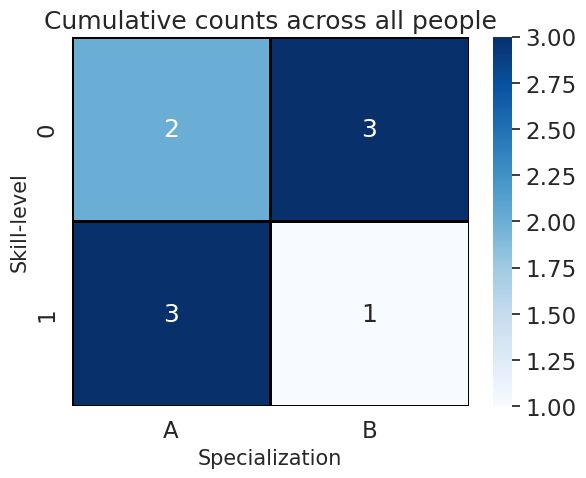

In [23]:
# https://stackoverflow.com/a/34712544/1164295
seaborn.set(font_scale=1.5)
# https://stackoverflow.com/a/57266083/1164295
seaborn.heatmap(df_cumulative_people, 
                annot=True, 
                fmt="d",
                yticklabels=df_cumulative_people.index, 
                cmap='Blues', 
                linewidths=1, 
                linecolor='black');
plt.title("Cumulative counts across all people")
plt.gca().set_xlabel('Specialization', fontsize=15);
plt.gca().set_ylabel('Skill-level', fontsize=15);

In [24]:
# TODO: A heat map of the ensemble of task per specializations in skill levels

In [25]:
aggregate_task_dict = {}
for specialization in config.skill_set_for_tasks:
    aggregate_task_dict[specialization] = [0 for _ in range(config.max_skill_level_per_task)]

aggregate_task_dict

{'A': [0, 0], 'B': [0, 0]}

In [26]:
for task_id,this_task in tasks_dict.items():
    #print('specialization:',task['specialization'])
    #print('skill-level:',task['skill level'])
    if this_task['skill level']>0:
        aggregate_task_dict[this_task['specialization']][this_task['skill level']-1] += 1

In [27]:
df_cumulative_tasks = pandas.DataFrame(aggregate_task_dict)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
df_cumulative_tasks = df_cumulative_tasks.set_index(pandas.Index(list(range(1,config.max_skill_level_per_task+1))))

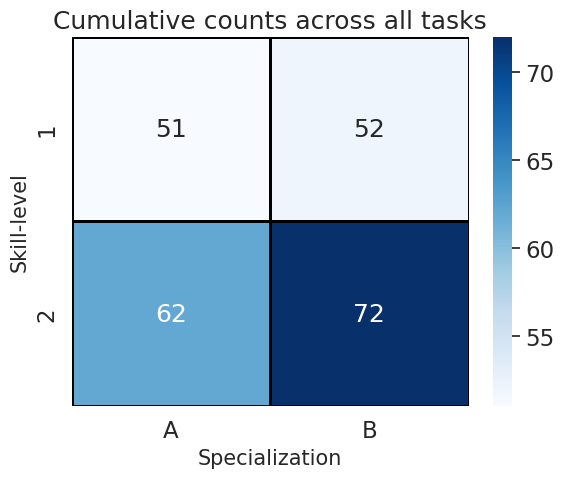

In [28]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

# https://stackoverflow.com/a/34712544/1164295
seaborn.set(font_scale=1.5)
# https://stackoverflow.com/a/57266083/1164295
seaborn.heatmap(df_cumulative_tasks, 
                annot=True, 
                fmt="d",
                yticklabels=df_cumulative_tasks.index, 
                cmap='Blues', 
                linewidths=1, 
                linecolor='black');
plt.title("Cumulative counts across all tasks")
plt.gca().set_xlabel('Specialization', fontsize=15);
plt.gca().set_ylabel('Skill-level', fontsize=15);

In [29]:
# TODO: Heat map with axes of time and person index, 
# with the color being the length of the backlog per person per time

In [30]:
person_time_backlog_dict = {}
for person_index in range(len(list_of_people)):
    
    description=""
    for specialization,skilllevel in list_of_people[person_index].skill_specialization_dict.items():
        description+=specialization+str(skilllevel)+","
    
    person_label = str(person_index)+": "+description[:-1]
    
    person_time_backlog_dict[person_label] = []
    for tick_index, journal_dict in list_of_people[person_index].work_journal_per_tick.items():
        #print(person_id, tick_index, journal_dict['number of tasks in backlog'])
        person_time_backlog_dict[person_label].append(journal_dict['number of tasks in backlog'])

In [31]:
df_person_time_backlog = pandas.DataFrame(person_time_backlog_dict)
#df_person_time_backlog

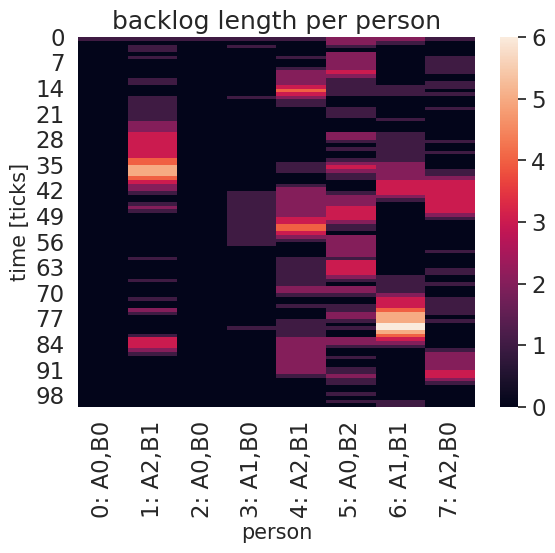

In [32]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

seaborn.heatmap(df_person_time_backlog)
plt.title('backlog length per person')
plt.gca().set_xlabel('person', fontsize=15);
plt.gca().set_ylabel('time [ticks]', fontsize=15);

## task ID per person versus time

In [33]:
person_time_taskID_dict = {}
for person_id, person in enumerate(list_of_people):
    person_time_taskID_dict[person_id] = []
    for tick, work_dict in person.work_journal_per_tick.items():
        #print(work_dict)
        person_time_taskID_dict[person_id].append(work_dict['task']['task ID'])

In [34]:
df_person_time_taskID = pandas.DataFrame(person_time_taskID_dict)
df_person_time_taskID

,0,1,2,3,4,5,6,7
0,0,1,2,3,4,5,6,7
1,8,9,2,3,10,0,5,11
2,8,3,2,2,12,7,13,14
3,8,8,15,16,17,18,13,19
4,20,21,15,16,22,18,23,24
5,20,16,15,25,18,13,23,24
6,20,26,15,27,28,21,29,24
7,20,30,15,27,31,23,29,24
8,32,33,15,27,31,20,29,24
9,34,35,15,36,31,32,29,25


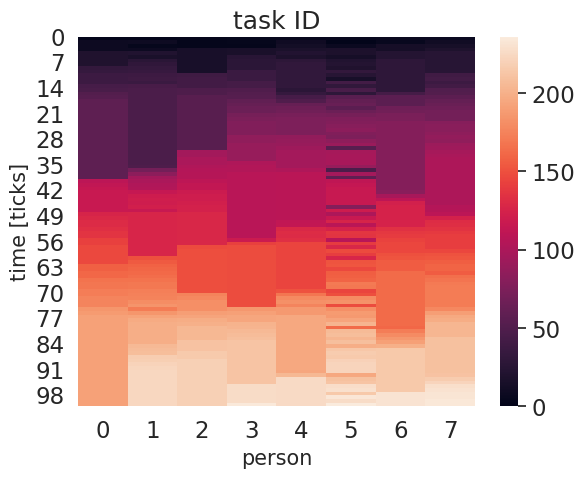

In [35]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

seaborn.heatmap(df_person_time_taskID)
plt.title('task ID')
plt.gca().set_xlabel('person', fontsize=15);
plt.gca().set_ylabel('time [ticks]', fontsize=15);

# ratio of the elapsed time for a task versus the number task for task.

In [36]:
min(df_person_time_taskID.min())

0

In [37]:
elapsed_task_timing = {}
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html
for task_id in range(min(df_person_time_taskID.min()),
                     max(df_person_time_taskID.max())):
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
    list_of_ticks_containing_task = list(df_person_time_taskID[
        df_person_time_taskID==task_id].dropna(axis=0,how='all').index)
    
    #assert(task_id==list_of_tasks[task_id-1]['task ID'])
    
    elapsed_task_timing[task_id] = {'first seen': min(list_of_ticks_containing_task),
                                    'last seen': max(list_of_ticks_containing_task),
                                    'task duration': 1}

In [38]:
df_task_timing = pandas.DataFrame(elapsed_task_timing).T
df_task_timing['task actual duration'] = df_task_timing['last seen'] - df_task_timing['first seen']+1
df_task_timing['ratio of actual to minimum'] = df_task_timing['task actual duration']/df_task_timing['task duration']
#df_task_timing

In [39]:
print("when the temporal cost of coordination is the same as just doing the work,")
print("with",number_of_people,"people the workload took",
      round(sum(df_task_timing['task actual duration'])/sum(df_task_timing['task duration']),2))
print("longer than if one qualified person had been assigned the same workload")

when the temporal cost of coordination is the same as just doing the work,
with 8 people the workload took 4.61
longer than if one qualified person had been assigned the same workload


In [40]:
# TODO: Heat map with axes of time and person index, 
# with the color being the status (working, idle, coordinating)

In [41]:
# TODO: A pie chart of the named persona types like unicorn and specialist. 
# The biggest piece of pie will be the others

## task throughput vs time

In [42]:
task_count_per_time_dict = {}
for person_id, person in enumerate(list_of_people):
    for tick, work_dict in person.work_journal_per_tick.items():
        if tick not in task_count_per_time_dict.keys():
            task_count_per_time_dict[tick] = 0
            
        if "task from" in work_dict.keys():
            #print(person_id, tick, work_dict["task from"])
            task_count_per_time_dict[tick] += 1

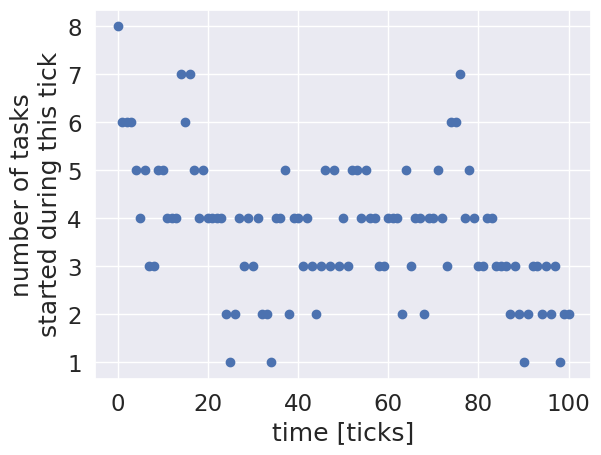

In [43]:
plt.scatter(x=task_count_per_time_dict.keys(), 
            y=task_count_per_time_dict.values())
plt.ylabel('number of tasks\nstarted during this tick')
plt.xlabel('time [ticks]');

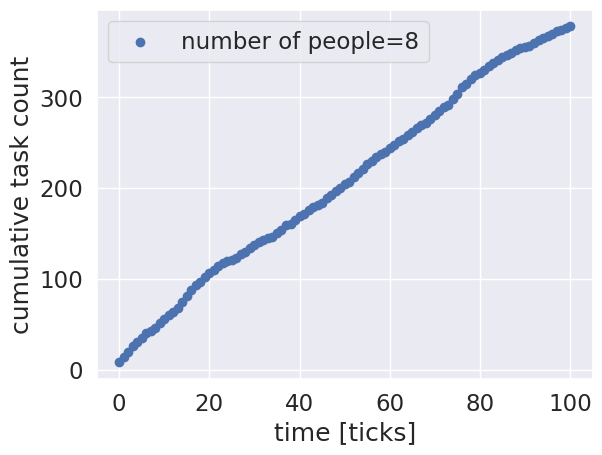

In [44]:
plt.scatter(x=list(task_count_per_time_dict.keys()), 
            y=list(numpy.cumsum(list(task_count_per_time_dict.values()))),
            label="number of people="+str(number_of_people))

plt.ylabel('cumulative task count')
plt.xlabel('time [ticks]');
plt.legend();

# The reward for good work is more work

In [45]:
people_versus_time_task_count={}
for person_id, person in enumerate(list_of_people):
    people_versus_time_task_count[person_id] = []
    completed_task_count = 0
    for tick, work_dict in person.work_journal_per_tick.items():
        if work_dict['outcome']=='task completed':
            completed_task_count+=1
        people_versus_time_task_count[person_id].append(completed_task_count)

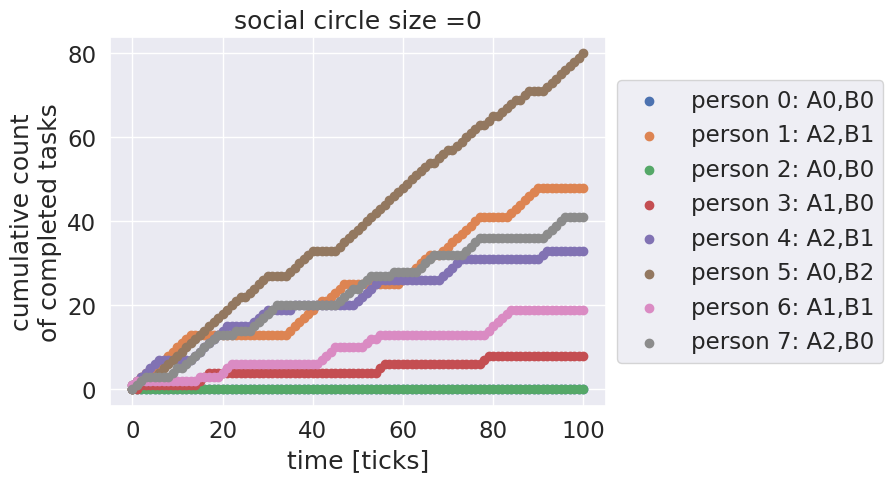

In [46]:
list_of_labels = []
list_of_task_counts = []

for person_index, completed_task_count in people_versus_time_task_count.items():
    description=""
    for specialization,skilllevel in list_of_people[person_index].skill_specialization_dict.items():
        description+=specialization+str(skilllevel)+","

    person_label = "person "+str(person_index)+": "+description[:-1]
    
    # these two lists are not used in this cell; they are for the stacked plot
    list_of_labels.append(person_label)
    list_of_task_counts.append(completed_task_count)
        
    plt.scatter(x=range(len(completed_task_count)),
                y=completed_task_count, 
                label=person_label)
    
# https://stackoverflow.com/a/4701285
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time [ticks]')
plt.ylabel('cumulative count\nof completed tasks');
plt.title('social circle size ='+str(social_circle_size));

## work done per person

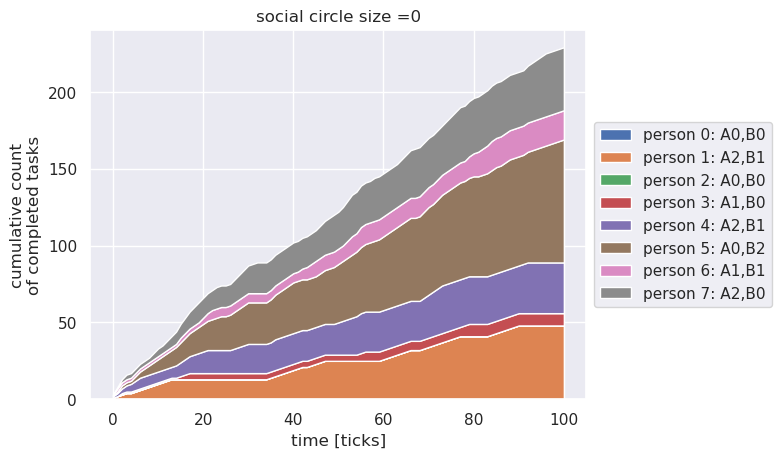

In [47]:
# https://www.python-graph-gallery.com/251-stacked-area-chart-with-seaborn-style
# https://www.python-graph-gallery.com/250-basic-stacked-area-chart

# set seaborn style
seaborn.set_theme()
    
plt.stackplot(range(len(completed_task_count)),
              list_of_task_counts,
              labels=list_of_labels)
    
# https://stackoverflow.com/a/4701285
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time [ticks]')
plt.ylabel('cumulative count\nof completed tasks');
plt.title('social circle size ='+str(social_circle_size));

## percentage stacked area chart

https://www.python-graph-gallery.com/255-percentage-stacked-area-chart

In [48]:
task_dict = {}
for person_index, cumulative_task_count in enumerate(list_of_task_counts):
    task_dict[person_index] = cumulative_task_count
    
df_task_cumulative_count = pandas.DataFrame(task_dict)

In [49]:
# https://stackoverflow.com/a/46738366

df_task_cumulative_percent = df_task_cumulative_count.divide(df_task_cumulative_count.sum(axis=1), axis=0)
  
#plot_me = df_task_cumulative_percent.T

#plot_me = df_task_cumulative_percent[df_task_cumulative_percent.columns[::-1]]

#plot_me[plot_me.columns[::-1]]

#df_to_plot = df_task_cumulative_percent.T


# https://stackoverflow.com/a/27817770

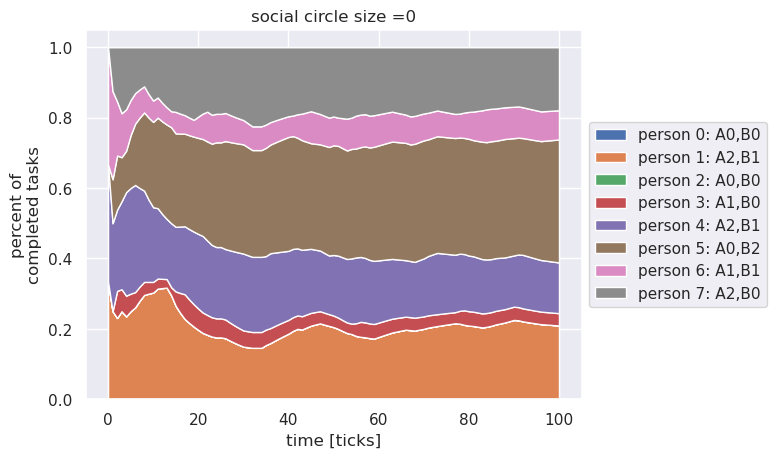

In [50]:
plt.stackplot(range(len(completed_task_count)),
              #df_task_cumulative_percent[df_task_cumulative_percent.columns[::-1]].T,
              df_task_cumulative_percent.T,
              #plot_me.T,
              #df_task_cumulative_percent[df_task_cumulative_percent.columns[::-1]].T,
              labels=list_of_labels)
    
# https://stackoverflow.com/a/4701285
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time [ticks]')
plt.ylabel('percent of\ncompleted tasks');
plt.title('social circle size ='+str(social_circle_size));

# TODO: https://en.wikipedia.org/wiki/Little%27s_law